**Dataset Download:**

In [1]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

! kaggle datasets download techzizou/labeled-mask-dataset-yolo-darknet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
 89% 112M/126M [00:02<00:00, 80.6MB/s] 
100% 126M/126M [00:02<00:00, 52.2MB/s]


In [3]:
import os
import shutil
import random
import sys
from tqdm import tqdm

import torch

from IPython.display import display
from PIL import Image
from zipfile import ZipFile

**Unzip:**

In [ ]:
zip = ZipFile('labeled-mask-dataset-yolo-darknet.zip')
zip.extractall()

In [4]:
zfile='labeled-mask-dataset-yolo-darknet.zip'
if os.path.isfile(zfile):
  shutil.unpack_archive(zfile, "Dataset")

**Imports:**

**Creating Folder Structure for Dataset:**

In [10]:
full_path= '/content/Dataset/obj/'
image_path= '/content/Dataset/images/'
label_path= '/content/Dataset/labels/'

if os.path.exists(image_path):
    shutil.rmtree(image_path)

if os.path.exists(label_path):
    shutil.rmtree(label_path)   

os.mkdir(image_path)
os.mkdir(label_path)

In [11]:
#train and val directories

train_img_path= image_path + 'training/'
os.mkdir(train_img_path)

train_label_path= label_path + 'training/'
os.mkdir(train_label_path)

val_img_path= image_path + 'validation/'
os.mkdir(val_img_path)

val_label_path= label_path +'validation/'
os.mkdir(val_label_path)

In [12]:
files= []
extension= '.jpg'
x_len= len(extension)
splitnum= 90 #defining 90:10 split for train and val

#filename w/o extension
for r, d, f in os.walk(full_path):
    for file in f:
        if file.endswith(extension):

            raw = file[0:len(file) - x_len]      
            files.append(raw)

random.shuffle(files)
size = len(files)                   

T_split = int(splitnum * size / 100) #split index

**Copying imgs and labels to their respective directories:**

**Training Data:**

In [15]:
#Train
for i in tqdm(range(T_split)):
                 
    image_file = files[i] + extension

    src_image = full_path + image_file

    shutil.copy(src_image, train_img_path) #transfer
                         
    annot_file = files[i] + '.txt'

    src_label = full_path + annot_file
    shutil.copy(src_label, train_label_path) 

100%|██████████| 1359/1359 [00:00<00:00, 2622.29it/s]


**Validation Data:**

In [16]:
#Val
for i in tqdm(range(T_split, size)):
                     
    image_file = files[i] + extension

    src_image = full_path + image_file

    shutil.copy(src_image, val_img_path) 
                         
    annot_file = files[i] + '.txt'

    src_label = full_path + annot_file
    shutil.copy(src_label, val_label_path) 

100%|██████████| 151/151 [00:00<00:00, 2143.70it/s]


**Installing YOLO v5:**

In [17]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt #dependencies for yolov5

from yolov5 import utils
display = utils.notebook_init()

YOLOv5 🚀 v6.2-186-g7f097dd Python-3.7.14 torch-1.12.1+cu113 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 37.7/107.7 GB disk)


**Training:**

yaml file:

In [28]:
#Creating a '.yaml' file which specifies the dataset directories to the model

f=open('/content/direc.yaml', 'a')

f.write("train: /content/Dataset/images/training\n")
f.write("val: /content/Dataset/images/validation\n")
f.write("nc: 2\n")
f.write("names: ['with mask', 'without mask']\n")

f.close()

In [20]:
%cd /content/yolov5

/content/yolov5


Training:

In [29]:
!python train.py --img 640 --batch 16 --epochs 5 --data /content/direc.yaml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=/content/direc.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=5, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-186-g7f097dd Python-3.7.14 torch-1.12.1+cu113 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, tran

In [ ]:
#download
#/content/yolov5/runs/train/exp3/weights/best.pt

**Testing saved weights:**

In [30]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/yolov5/runs/train/exp3/weights/best.pt')

/usr/local/lib/python3.7/dist-packages/torch/hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  "You are about to download and run code from an untrusted repository. In a future release, this won't "
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 v6.2-186-g7f097dd Python-3.7.14 torch-1.12.1+cu113 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding

In [31]:
result=model('/content/testimg.jpg')

List of all the detections:

In [51]:
import pandas as pd
res=result.pandas().xyxy[0]
df=pd.DataFrame(res)
df.drop("confidence", axis=1, inplace=True)
df

,xmin,ymin,xmax,ymax,class,name
0,21.560221,97.041801,57.322872,141.454544,0,with mask
1,58.505577,66.048363,85.264931,97.145515,0,with mask
2,241.121429,109.645622,269.494690,142.259705,1,without mask
3,130.343506,104.619659,160.318466,136.316956,1,without mask
4,188.036591,110.959106,213.018509,139.844452,1,without mask
5,101.366013,88.576286,128.466995,115.497620,0,with mask
6,180.088562,68.529594,199.264603,91.490784,0,with mask
7,24.653629,112.447044,53.204311,137.012726,0,with mask
8,209.598053,121.412651,246.369354,168.147110,1,without mask
9,183.091141,86.700249,210.303055,114.440163,1,without mask


In [64]:
!python detect.py --weights /content/yolov5/runs/train/exp3/weights/best.pt --img 640 --conf 0.4 --source /content/testimg.jpg

detect: weights=['/content/yolov5/runs/train/exp3/weights/best.pt'], source=/content/testimg.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-186-g7f097dd Python-3.7.14 torch-1.12.1+cu113 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/testimg.jpg: 416x640 1 with mask, 4 without masks, 282.0ms
Speed: 2.5ms pre-process, 282.0ms inference, 1.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp8


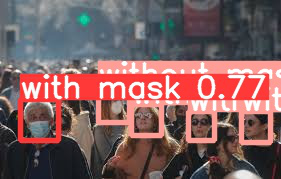

In [65]:
from IPython.display import display
from PIL import Image

image_path = "/content/yolov5/runs/detect/exp8/testimg.jpg"
display(Image.open(image_path))
#there is one misclassification 